In [1]:
import numpy as np
import pickle
import cv2
import glob,os
from os import listdir
from sklearn.preprocessing import LabelBinarizer
from keras.models import Sequential
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation, Flatten, Dropout, Dense
from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from keras.preprocessing import image
from keras.preprocessing.image import img_to_array
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [ ]:
# Import all necessary Library  

In [2]:
EPOCHS = 200
INIT_LR = 1e-3
BS = 32
default_image_size = tuple((100, 100))
image_size = 0
directory_root = 'F:/Pytho/re/Train/result/check'
width=100
height=100
depth=3

In [ ]:
#Set number of epocs (EPOCHS), learning rate(INIT_LR), Batch number (BS), Image Size (default_image_size) , Root Directory Image Hight, Wight, Depth 

In [3]:
def convert_image_to_array(image_dir):
    try:
        image = cv2.imread(image_dir)
        if image is not None :
            image = cv2.resize(image, default_image_size)   
            return img_to_array(image)
        else :
            return np.array([])
    except Exception as e:
        print(f"Error : {e}")
        return None

In [ ]:
#This method converts images into numpy arrays

In [4]:
image_list = []
label_list = [] 
fruit_images = []
labels = [] 
for fruit_dir_path in glob.glob("F:/Pytho/re/Train/result/check/*"):
    fruit_label = fruit_dir_path.split("/")[-1]
    for image_path in glob.glob(os.path.join(fruit_dir_path, "*.jpg")):
        image = cv2.imread(image_path, cv2.IMREAD_COLOR)
        
        image = cv2.resize(image, (100, 100))
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        #image = getSixChannel(image)
        
        fruit_images.append(image)
        labels.append(fruit_label)
fruit_images = np.array(fruit_images)
labels = np.array(labels)

image_list = fruit_images
label_list = labels

In [ ]:
#Reading images from Train set amd the folder name is set as class label
#two lists -> one for all image array values (image_list = fruit_images) and all class label values (label_list = labels)

In [5]:
image_size = len(image_list)

In [ ]:
#Number of class

In [6]:
label_binarizer = LabelBinarizer()
image_labels = label_binarizer.fit_transform(label_list)
pickle.dump(label_binarizer,open('label_transform.pkl', 'wb'))
n_classes = len(label_binarizer.classes_)

In [ ]:
#Label binarizer convers class name from string to integer (i.e., "Class_0" -> 0,"Class_1" -> 1)

In [7]:
print(label_binarizer.classes_)

['check\\Class_0' 'check\\Class_1' 'check\\Class_2' 'check\\Class_3'
 'check\\Class_4' 'check\\Class_5' 'check\\Class_A' 'check\\Class_B'
 'check\\Class_C' 'check\\Class_D' 'check\\Class_E' 'check\\Class_F'
 'check\\Class_G' 'check\\Class_H' 'check\\Class_I' 'check\\Class_J'
 'check\\Class_K' 'check\\Class_L' 'check\\Class_M' 'check\\Class_N'
 'check\\Class_O' 'check\\Class_P' 'check\\Class_Q' 'check\\Class_R'
 'check\\Class_S' 'check\\Class_T' 'check\\Class_U' 'check\\Class_V'
 'check\\Class_W' 'check\\Class_X' 'check\\Class_Y' 'check\\Class_Z']


In [8]:
np_image_list = np.array(image_list, dtype=np.float16) / 225.0

In [9]:
#print("[INFO] Spliting data to train, test")
#x_train, x_test, y_train, y_test = train_test_split(np_image_list, image_labels, test_size=0.2, random_state = 42) 

In [ ]:
#Comment out this section if you want to create test set from the train set otherwise read test set

In [10]:
image_list_v = []
label_list_v = []
validation_fruit_images = []
validation_labels = [] 
for fruit_dir_path in glob.glob("F:/Pytho/re/Test2/check/*"):
    fruit_label = fruit_dir_path.split("/")[-1]
    for image_path in glob.glob(os.path.join(fruit_dir_path, "*.jpg")):
        image = cv2.imread(image_path, cv2.IMREAD_COLOR)
        
        image = cv2.resize(image, (100, 100))
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        #image = getSixChannel(image)
        
        validation_fruit_images.append(image)
        validation_labels.append(fruit_label)
        
validation_fruit_images = np.array(validation_fruit_images)
validation_labels = np.array(validation_labels)

image_list_v = validation_fruit_images
label_list_v = validation_labels

In [ ]:
#Reading images from Test set amd the folder name is set as class label
#two lists kept for validation -> one for all image array values (image_list_v = validation_fruit_images) and all class label values (label_list_v = validation_labels)

In [11]:
np_image_list_v = np.array(image_list_v, dtype=np.float16) / 225.0
image_labels_v = label_binarizer.fit_transform(label_list_v)

In [12]:
x_train, x_test = np_image_list, np_image_list_v
y_train, y_test = image_labels, image_labels_v

In [ ]:
#Test Set and Train Set creation

In [13]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(9600, 100, 100, 3)
(9600, 32)
(282, 100, 100, 3)
(282, 32)


In [ ]:
#printing array shapes

In [14]:
aug = ImageDataGenerator(
    rotation_range=25, width_shift_range=0.1,
    height_shift_range=0.1, shear_range=0.2, 
    zoom_range=0.2,horizontal_flip=True, 
    fill_mode="nearest")

In [ ]:
#Image Augmnetation 

In [15]:
model = Sequential()
inputShape = (height, width, depth)
chanDim = -1
if K.image_data_format() == "channels_first":
    inputShape = (depth, height, width)
    chanDim = 1
model.add(Conv2D(32, (3, 3), padding="same",input_shape=inputShape))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(Conv2D(64, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(128, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(Conv2D(128, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(1024))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(n_classes))
model.add(Activation("softmax"))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [ ]:
#CNN Model creation 

In [16]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 100, 100, 32)      896       
_________________________________________________________________
activation_1 (Activation)    (None, 100, 100, 32)      0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 100, 100, 32)      128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 33, 33, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 33, 33, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 33, 33, 64)        18496     
_________________________________________________________________
activation_2 (Activation)    (None, 33, 33, 64)        0         
__________

In [18]:
opt = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)
# distribution
model.compile(loss="categorical_crossentropy", optimizer=opt,metrics=["accuracy"]) #"binary_crossentropy"
# train the network
print("[INFO] training network...")

[INFO] training network...


In [19]:
from keras.callbacks import ModelCheckpoint
checkpointer = ModelCheckpoint(filepath="model22/best_weights22.hdf5", 
                               monitor = 'val_acc',
                               verbose=1, 
                               save_best_only=True)

In [20]:
history = model.fit_generator(aug.flow(x_train, y_train, batch_size=BS),
    validation_data=(x_test, y_test), steps_per_epoch=len(x_train) // BS,
    epochs=300,callbacks=[checkpointer])

Instructions for updating:
Use tf.cast instead.
Epoch 1/300
300/300 [==============================] - 148s 492ms/step - loss: 2.8477 - acc: 0.2668 - val_loss: 1.8593 - val_acc: 0.5638

Epoch 00001: val_acc improved from -inf to 0.56383, saving model to model22/best_weights22.hdf5
Epoch 2/300
300/300 [==============================] - 144s 479ms/step - loss: 1.7257 - acc: 0.4777 - val_loss: 1.1732 - val_acc: 0.6631

Epoch 00002: val_acc improved from 0.56383 to 0.66312, saving model to model22/best_weights22.hdf5
Epoch 3/300
300/300 [==============================] - 144s 480ms/step - loss: 1.3231 - acc: 0.5833 - val_loss: 0.3824 - val_acc: 0.8582

Epoch 00003: val_acc improved from 0.66312 to 0.85816, saving model to model22/best_weights22.hdf5
Epoch 4/300
300/300 [==============================] - 145s 485ms/step - loss: 1.1076 - acc: 0.6458 - val_loss: 0.7676 - val_acc: 0.7553

Epoch 00004: val_acc did not improve from 0.85816
Epoch 5/300
300/300 [==============================] - 1

300/300 [==============================] - 144s 479ms/step - loss: 0.2393 - acc: 0.9239 - val_loss: 0.1740 - val_acc: 0.9468

Epoch 00041: val_acc did not improve from 0.97163
Epoch 42/300
300/300 [==============================] - 144s 480ms/step - loss: 0.2313 - acc: 0.9281 - val_loss: 0.2282 - val_acc: 0.9362

Epoch 00042: val_acc did not improve from 0.97163
Epoch 43/300
300/300 [==============================] - 144s 479ms/step - loss: 0.2179 - acc: 0.9295 - val_loss: 0.1178 - val_acc: 0.9645

Epoch 00043: val_acc did not improve from 0.97163
Epoch 44/300
300/300 [==============================] - 144s 479ms/step - loss: 0.2099 - acc: 0.9339 - val_loss: 0.1862 - val_acc: 0.9539

Epoch 00044: val_acc did not improve from 0.97163
Epoch 45/300
300/300 [==============================] - 144s 480ms/step - loss: 0.2062 - acc: 0.9309 - val_loss: 0.1415 - val_acc: 0.9539

Epoch 00045: val_acc did not improve from 0.97163
Epoch 46/300
300/300 [==============================] - 144s 479ms/s

300/300 [==============================] - 144s 480ms/step - loss: 0.1349 - acc: 0.9571 - val_loss: 0.2091 - val_acc: 0.9610

Epoch 00083: val_acc did not improve from 0.98936
Epoch 84/300
300/300 [==============================] - 144s 481ms/step - loss: 0.1374 - acc: 0.9543 - val_loss: 0.1122 - val_acc: 0.9716

Epoch 00084: val_acc did not improve from 0.98936
Epoch 85/300
300/300 [==============================] - 144s 481ms/step - loss: 0.1180 - acc: 0.9618 - val_loss: 0.2220 - val_acc: 0.9539

Epoch 00085: val_acc did not improve from 0.98936
Epoch 86/300
300/300 [==============================] - 144s 481ms/step - loss: 0.1025 - acc: 0.9673 - val_loss: 0.1544 - val_acc: 0.9645

Epoch 00086: val_acc did not improve from 0.98936
Epoch 87/300
300/300 [==============================] - 144s 480ms/step - loss: 0.1119 - acc: 0.9636 - val_loss: 0.1971 - val_acc: 0.9681

Epoch 00087: val_acc did not improve from 0.98936
Epoch 88/300
300/300 [==============================] - 144s 480ms/s

300/300 [==============================] - 145s 482ms/step - loss: 0.0880 - acc: 0.9714 - val_loss: 0.0980 - val_acc: 0.9752

Epoch 00126: val_acc did not improve from 0.98936
Epoch 127/300
300/300 [==============================] - 145s 483ms/step - loss: 0.0832 - acc: 0.9743 - val_loss: 0.1206 - val_acc: 0.9716

Epoch 00127: val_acc did not improve from 0.98936
Epoch 128/300
300/300 [==============================] - 145s 483ms/step - loss: 0.0897 - acc: 0.9696 - val_loss: 0.0987 - val_acc: 0.9858

Epoch 00128: val_acc did not improve from 0.98936
Epoch 129/300
300/300 [==============================] - 145s 484ms/step - loss: 0.0777 - acc: 0.9742 - val_loss: 0.0973 - val_acc: 0.9823

Epoch 00129: val_acc did not improve from 0.98936
Epoch 130/300
300/300 [==============================] - 145s 483ms/step - loss: 0.0813 - acc: 0.9750 - val_loss: 0.1159 - val_acc: 0.9752

Epoch 00130: val_acc did not improve from 0.98936
Epoch 131/300
300/300 [==============================] - 145s 48

300/300 [==============================] - 145s 485ms/step - loss: 0.0512 - acc: 0.9808 - val_loss: 0.1029 - val_acc: 0.9823

Epoch 00169: val_acc did not improve from 0.99291
Epoch 170/300
300/300 [==============================] - 145s 484ms/step - loss: 0.0698 - acc: 0.9759 - val_loss: 0.4337 - val_acc: 0.9078

Epoch 00170: val_acc did not improve from 0.99291
Epoch 171/300
300/300 [==============================] - 146s 486ms/step - loss: 0.0519 - acc: 0.9837 - val_loss: 0.1160 - val_acc: 0.9858

Epoch 00171: val_acc did not improve from 0.99291
Epoch 172/300
300/300 [==============================] - 145s 484ms/step - loss: 0.0592 - acc: 0.9810 - val_loss: 0.1060 - val_acc: 0.9858

Epoch 00172: val_acc did not improve from 0.99291
Epoch 173/300
300/300 [==============================] - 146s 485ms/step - loss: 0.0512 - acc: 0.9823 - val_loss: 0.0787 - val_acc: 0.9894

Epoch 00173: val_acc did not improve from 0.99291
Epoch 174/300
300/300 [==============================] - 146s 48

300/300 [==============================] - 146s 486ms/step - loss: 0.0500 - acc: 0.9844 - val_loss: 0.0903 - val_acc: 0.9823

Epoch 00212: val_acc did not improve from 0.99645
Epoch 213/300
300/300 [==============================] - 146s 487ms/step - loss: 0.0522 - acc: 0.9841 - val_loss: 0.1282 - val_acc: 0.9858

Epoch 00213: val_acc did not improve from 0.99645
Epoch 214/300
300/300 [==============================] - 146s 486ms/step - loss: 0.0510 - acc: 0.9831 - val_loss: 0.1652 - val_acc: 0.9539

Epoch 00214: val_acc did not improve from 0.99645
Epoch 215/300
300/300 [==============================] - 146s 486ms/step - loss: 0.0491 - acc: 0.9831 - val_loss: 0.1065 - val_acc: 0.9787

Epoch 00215: val_acc did not improve from 0.99645
Epoch 216/300
300/300 [==============================] - 146s 486ms/step - loss: 0.0419 - acc: 0.9864 - val_loss: 0.1485 - val_acc: 0.9681

Epoch 00216: val_acc did not improve from 0.99645
Epoch 217/300
300/300 [==============================] - 146s 48

300/300 [==============================] - 146s 488ms/step - loss: 0.0442 - acc: 0.9861 - val_loss: 0.1326 - val_acc: 0.9787

Epoch 00255: val_acc did not improve from 0.99645
Epoch 256/300
300/300 [==============================] - 147s 488ms/step - loss: 0.0397 - acc: 0.9870 - val_loss: 0.1050 - val_acc: 0.9823

Epoch 00256: val_acc did not improve from 0.99645
Epoch 257/300
300/300 [==============================] - 146s 488ms/step - loss: 0.0395 - acc: 0.9879 - val_loss: 0.1155 - val_acc: 0.9787

Epoch 00257: val_acc did not improve from 0.99645
Epoch 258/300
300/300 [==============================] - 146s 488ms/step - loss: 0.0393 - acc: 0.9879 - val_loss: 0.0878 - val_acc: 0.9858

Epoch 00258: val_acc did not improve from 0.99645
Epoch 259/300
300/300 [==============================] - 147s 488ms/step - loss: 0.0344 - acc: 0.9884 - val_loss: 0.1026 - val_acc: 0.9752

Epoch 00259: val_acc did not improve from 0.99645
Epoch 260/300
300/300 [==============================] - 147s 48

300/300 [==============================] - 148s 494ms/step - loss: 0.0318 - acc: 0.9906 - val_loss: 0.1985 - val_acc: 0.9433

Epoch 00298: val_acc did not improve from 0.99645
Epoch 299/300
300/300 [==============================] - 148s 494ms/step - loss: 0.0329 - acc: 0.9894 - val_loss: 0.1048 - val_acc: 0.9858

Epoch 00299: val_acc did not improve from 0.99645
Epoch 300/300
300/300 [==============================] - 148s 493ms/step - loss: 0.0363 - acc: 0.9880 - val_loss: 0.1026 - val_acc: 0.9894

Epoch 00300: val_acc did not improve from 0.99645


In [34]:
model.load_weights('model22/best_weights22.hdf5')
model.save('model22/shapes_cnn22.h5')
#model.load_weights('best_weights22.hdf5')
#model.save('shapes_cnn22.h5')

In [ ]:
#Saving best model's weights

In [32]:
model.load_weights('D:/best_weights.hdf5')
model.save('D:/shapes_cnn.h5')

OSError: Unable to open file (unable to open file: name = 'D:/best_weights.hdf5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

In [22]:
prediction= model.predict(x_test, verbose=0)
print(prediction)

[[1.00000000e+00 1.16069014e-20 1.05118742e-20 ... 2.86433476e-18
  1.34574561e-21 5.86088998e-14]
 [1.00000000e+00 2.80363175e-20 3.20504958e-20 ... 1.80764379e-18
  4.03964800e-20 1.14083463e-14]
 [9.99999762e-01 2.97251291e-17 1.39863619e-17 ... 1.52885824e-17
  7.78408508e-16 1.87943272e-07]
 ...
 [6.71524841e-15 1.72868770e-24 3.06685873e-25 ... 2.21946706e-24
  4.86631095e-23 1.00000000e+00]
 [3.02996338e-16 7.40433243e-27 6.33318518e-28 ... 1.59233962e-26
  5.25414705e-26 1.00000000e+00]
 [5.13956762e-18 1.89914580e-28 1.36777228e-29 ... 2.80994792e-28
  3.01217417e-28 1.00000000e+00]]


In [23]:
pred =[]
for i in range(0,282):
    ind=np.argmax(prediction[i])
    pred.append(ind)
print(pred)    

[0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 4, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 10, 10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14, 14, 14, 15, 15, 15, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 16, 16, 16, 17, 17, 17, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 18, 18, 18, 18, 19, 19, 19, 19, 19, 19, 19, 19, 19, 20, 20, 20, 20, 20, 20, 20, 20, 20, 21, 21, 21, 21, 21, 21, 21, 21, 21, 22, 22, 22, 22, 22, 22, 22, 22, 22, 23, 23, 23, 23, 23, 23, 23, 23, 23, 24, 24, 24, 24, 24, 24, 24, 24, 24, 25, 25, 25, 25, 25, 25, 25, 25, 25, 26, 26, 26, 26, 26, 26, 26, 26, 26, 27, 27, 27, 27, 27, 27, 27, 27, 27, 28, 28, 28, 28, 28, 28, 28, 28, 28, 29, 29, 29, 29, 29, 29, 29, 29, 29, 30, 30, 30, 30, 30, 30, 30,

In [ ]:
#Array with all Predicted class label

In [24]:
tru =[]
for i in range(0,282):
    ind=np.argmax(image_labels_v[i])
    tru.append(ind)
print(tru) 

[0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 10, 10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14, 14, 14, 15, 15, 15, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 16, 16, 16, 17, 17, 17, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 18, 18, 18, 18, 19, 19, 19, 19, 19, 19, 19, 19, 19, 20, 20, 20, 20, 20, 20, 20, 20, 20, 21, 21, 21, 21, 21, 21, 21, 21, 21, 22, 22, 22, 22, 22, 22, 22, 22, 22, 23, 23, 23, 23, 23, 23, 23, 23, 23, 24, 24, 24, 24, 24, 24, 24, 24, 24, 25, 25, 25, 25, 25, 25, 25, 25, 25, 26, 26, 26, 26, 26, 26, 26, 26, 26, 27, 27, 27, 27, 27, 27, 27, 27, 27, 28, 28, 28, 28, 28, 28, 28, 28, 28, 29, 29, 29, 29, 29, 29, 29, 29, 29, 30, 30, 30, 30, 30, 30, 30,

In [ ]:
#Array with all True class label

In [25]:
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import classification_report
print(classification_report(tru,pred,target_names=label_binarizer.classes_))

               precision    recall  f1-score   support

check\Class_0       1.00      1.00      1.00         8
check\Class_1       1.00      1.00      1.00         8
check\Class_2       1.00      1.00      1.00         8
check\Class_3       1.00      1.00      1.00         8
check\Class_4       0.89      1.00      0.94         8
check\Class_5       1.00      0.88      0.93         8
check\Class_A       1.00      1.00      1.00         9
check\Class_B       1.00      1.00      1.00         9
check\Class_C       1.00      1.00      1.00         9
check\Class_D       1.00      1.00      1.00         9
check\Class_E       1.00      1.00      1.00         9
check\Class_F       1.00      1.00      1.00         9
check\Class_G       1.00      1.00      1.00         9
check\Class_H       1.00      1.00      1.00         9
check\Class_I       1.00      1.00      1.00         9
check\Class_J       1.00      1.00      1.00         9
check\Class_K       1.00      1.00      1.00         9
check\Cla

In [ ]:
#Precision Recall F1 Csore calculation

In [26]:
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, yhat_classes)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, yhat_classes)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, yhat_classes)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, yhat_classes)
print('F1 score: %f' % f1)

NameError: name 'accuracy_score' is not defined

In [ ]:
history = model.fit_generator(aug.flow(x_train, y_train, batch_size=BS),
    validation_data=(x_test, y_test), steps_per_epoch=len(x_train) // BS,
    epochs=50)

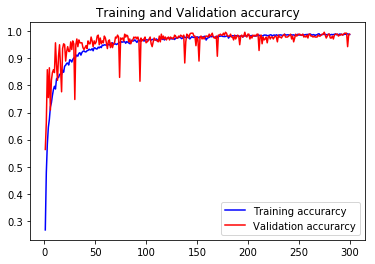

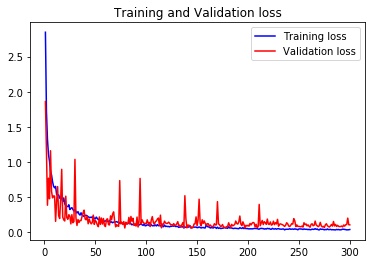

In [27]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
#Train and validation accuracy
plt.plot(epochs, acc, 'b', label='Training accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
plt.title('Training and Validation accurarcy')
plt.legend()

plt.figure()
#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()
plt.show()

In [ ]:
#Graph Show

In [28]:
print("[INFO] Calculating model accuracy")
scores = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {scores[1]*100}")

[INFO] Calculating model accuracy
282/282 [==============================] - 2s 7ms/step
Test Accuracy: 99.64539007092199


In [ ]:
#Accuracy of best model

In [35]:
# save the model to disk
print("[INFO] Saving model...")
pickle.dump(model,open('model22/cnn_model.pkl', 'wb'))

[INFO] Saving model...


In [ ]:
#Saving best model weights